# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import sys

# Import API key
from api_keys import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [11]:
# Base URL
w_url = "http://api.openweathermap.org/data/2.5/weather?"

# Set to retrieve data in Farenheit 
units = ["imperial"]

# Create empty lists to hold data to be retrieved using json call
city_names = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start logging the data retrieval
print(f"Beginning Data Retrieval")
print(f"------------------------------------")

# Set a counter for each city's retrieval
counter = 1
# The openweatehrmap API claims that on an average it can make 60 calls per minute (one call per sec).
# Based on this assignment's requirement, we have to limit to 50 calls per set/batch...
# Retrieval of the next set of 50 calls can wait until the start of subsequent minute
# allowing it to do a thorough job with no loss of data.

# Declare a variable to track the number of calls per minute in sets
sets = 1
# Declare variables to keep track of call start time, end time and elapsed time
start_time = time.time()

# Declare a variable to count the failed cities
error = 0

# For each city in the list of cities, start calling the API for weater data 
for city in cities:
    # Let's add a try to catch the skipped cities
    try:
        # Build query URL to retrieve the weather data
        query_url = f"{w_url}appid={api_keys['wkey']}&q={city}&units={units}"
        # We need at least 500 cities' weather data. That would be 10 sets of 50 calls/records.
        if (sets <= 10): # ********Please replace this with 1 to save the number of calls to the API!********
            # Get weather data as json
            w_response = requests.get(query_url).json()
        else:
            break
            
        # Collect required features for analysis
        city_names.append(w_response["name"])
        cloudiness.append(w_response["clouds"]["all"])
        country.append(w_response["sys"]["country"])
        date.append(w_response["dt"])
        humidity.append(w_response["main"]["humidity"])
        lat.append(w_response["coord"]["lat"])
        lng.append(w_response["coord"]["lon"])
        wind_speed.append(w_response["wind"]["speed"])
        max_temp.append(w_response["main"]["temp_max"])

        # Continue logging...
        city = w_response["name"]
        print(f"Processing Record {counter} of Set {sets} | " + city)
        
        # Increment the counter to process the next record...
        counter = counter + 1
        if (counter == 51): # 50 calls limit exceeded?
            end_time = time.time() # Capture the current time as set end time
            counter = 1 # Reset the counter
            sets = sets + 1 # Increment the sets value by one
            elapsed_time = end_time - start_time # Compute elapsed_time
            time.sleep(60 - elapsed_time) # Wait until the start of next minute
            start_time = time.time() # Reset timer after the wait
    # City not found? Skip...
    except Exception as e:
        #print(e) #Print the error
        error = error + 1
        print(f"\nCity {city} not found.  Skipping...\n")
print(f"\nCouldn't process {error} of cities due to non-availability of data\n")
print(f"------------------------------------")
print(f"Data Retrieval Complete")
print(f"------------------------------------")

Beginning Data Retrieval
------------------------------------

City barentsburg not found.  Skipping...

Processing Record 1 of Set 1 | Lasa

City illoqqortoormiut not found.  Skipping...


City asfi not found.  Skipping...

Processing Record 2 of Set 1 | Puerto Ayora
Processing Record 3 of Set 1 | Qaanaaq
Processing Record 4 of Set 1 | Bluff

City zhanatas not found.  Skipping...

Processing Record 5 of Set 1 | Pasni
Processing Record 6 of Set 1 | Nikolskoye
Processing Record 7 of Set 1 | Ushuaia

City rungata not found.  Skipping...

Processing Record 8 of Set 1 | Butaritari
Processing Record 9 of Set 1 | Prince Rupert
Processing Record 10 of Set 1 | Tiksi
Processing Record 11 of Set 1 | Hermanus
Processing Record 12 of Set 1 | Saint-Philippe
Processing Record 13 of Set 1 | Lysyye Gory
Processing Record 14 of Set 1 | Lumphat
Processing Record 15 of Set 1 | Ancud

City sumbawa not found.  Skipping...

Processing Record 16 of Set 1 | Isangel

City krasnoyarsk-66 not found.  Skipping...

Processing Record 21 of Set 4 | Bogorodskoye
Processing Record 22 of Set 4 | Pocoes
Processing Record 23 of Set 4 | Salinopolis
Processing Record 24 of Set 4 | Noyabrsk

City attawapiskat not found.  Skipping...

Processing Record 25 of Set 4 | Lebu
Processing Record 26 of Set 4 | Nizhniy Ingash
Processing Record 27 of Set 4 | Tateyama
Processing Record 28 of Set 4 | Bilibino
Processing Record 29 of Set 4 | Bismarck
Processing Record 30 of Set 4 | Cahors
Processing Record 31 of Set 4 | Nuuk
Processing Record 32 of Set 4 | Vigrestad
Processing Record 33 of Set 4 | Vestmannaeyjar

City umzimvubu not found.  Skipping...

Processing Record 34 of Set 4 | Poum
Processing Record 35 of Set 4 | Shingu
Processing Record 36 of Set 4 | Longyearbyen
Processing Record 37 of Set 4 | Ostersund
Processing Record 38 of Set 4 | Adelaide
Processing Record 39 of Set 4 | Tignere
Processing Record 40 of Set 4 | Shyryayeve
Processing Record 41 of Set 4 | San Jose
Processing Record 42 of Set 4 | Merritt Island

Processing Record 2 of Set 8 | Fortuna
Processing Record 3 of Set 8 | Tabuk
Processing Record 4 of Set 8 | Ust-Ishim
Processing Record 5 of Set 8 | Mampong
Processing Record 6 of Set 8 | Faanui
Processing Record 7 of Set 8 | Acajutla
Processing Record 8 of Set 8 | Guadalupe y Calvo
Processing Record 9 of Set 8 | Seybaplaya
Processing Record 10 of Set 8 | San Pedro
Processing Record 11 of Set 8 | Katsuura
Processing Record 12 of Set 8 | Tandil
Processing Record 13 of Set 8 | Ballina
Processing Record 14 of Set 8 | Benguela

City marcona not found.  Skipping...


City ust-bolsheretsk not found.  Skipping...

Processing Record 15 of Set 8 | Mahebourg
Processing Record 16 of Set 8 | Angoche
Processing Record 17 of Set 8 | Ahmadnagar
Processing Record 18 of Set 8 | El Balsamo
Processing Record 19 of Set 8 | Yangambi
Processing Record 20 of Set 8 | Pochutla
Processing Record 21 of Set 8 | Necochea
Processing Record 22 of Set 8 | Tallahassee
Processing Record 23 of Set 8 | Correntina
Processi

Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
# Create a dictionary with collected features
weather_dict = {
    "City": city_names,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.count(axis=0)
# Export the city data into a .csv.
weather_data.to_csv(path_or_buf='../WeatherData.csv', sep=',', encoding='utf-8', index=False, header=True)
#weather_data.columns
# Display the DataFrame
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Lasa,48,CY,1550887200,87,34.92,32.53,281.150,4.60
1,Puerto Ayora,0,EC,1550888995,97,-0.74,-90.35,299.685,3.67
2,Qaanaaq,12,GL,1550888987,96,77.48,-69.36,242.560,1.92
3,Bluff,0,AU,1550889284,33,-23.58,149.07,307.035,4.32
4,Pasni,92,PK,1550889428,98,25.26,63.48,292.310,1.97


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

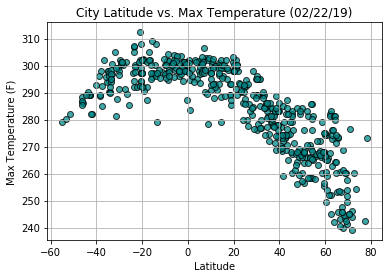

In [13]:
plt.scatter(weather_data['Lat'], weather_data['Max Temp'], marker="o",
           facecolor="darkcyan", edgecolor="black", alpha=0.75)
plt.title("City Latitude vs. Max Temperature (02/22/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()

#### Latitude vs. Humidity Plot

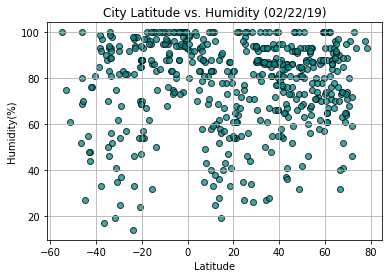

In [14]:
plt.scatter(weather_data['Lat'], weather_data['Humidity'], marker="o",
           facecolor="darkcyan", edgecolor="black", alpha=0.75)
plt.title("City Latitude vs. Humidity (02/22/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid()
plt.show()

#### Latitude vs. Cloudiness Plot

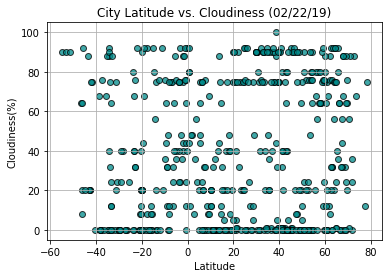

In [15]:
plt.scatter(weather_data['Lat'], weather_data['Cloudiness'], marker="o",
           facecolor="darkcyan", edgecolor="black", alpha=0.75)
plt.title("City Latitude vs. Cloudiness (02/22/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()
plt.show()

#### Latitude vs. Wind Speed Plot

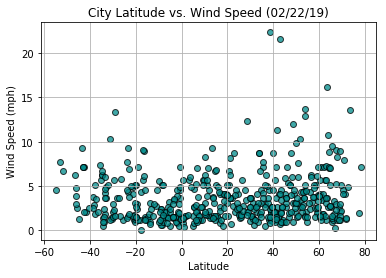

In [16]:
plt.scatter(weather_data['Lat'], weather_data['Wind Speed'], marker="o",
           facecolor="darkcyan", edgecolor="black", alpha=0.75)
plt.title("City Latitude vs. Wind Speed (02/22/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()